# Week 1: Classification
Author: Van Bach Nguyen, licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/

# Table of contents
[- Exercise 1: Diabetes classification ](#Ex1)  
[- Exercise 2: Cervical Cancer classification ](#Ex2)  
[- Exercise 3: Handwritten Digits Classification ](#Ex3)  

# Exercise 1: Diabetes classification <a name="Ex1"></a>
**Goal:** To setup environment, become famililar with python, jupyter notebooks, machine learning problems and recall the lecture.  
**Task:** Run the example and understand it.  
**Note:** 
- This example is a small practice exercise for the lecture. The real-world problem is much more complex.  
- This example will use Python with some common libraries in machine learning/data science, such as [pandas](https://pandas.pydata.org/), [sklearn](https://scikit-learn.org/), [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/).  
- If you are not familiar with Python, you can practice by following these resources: [Introduction](python-exercises/00_intro_python_full_examples.ipynb), [Basics](python-exercises/01_basics_in_python_solution.ipynb)
- For someone who is not familiar with machine learning in general, we recommend taking this specialization course: https://www.coursera.org/specializations/machine-learning-introduction



#### Description: Imagine, you work for a data science company in a project with a hospital. The hospital wants a machine learning model that can predict whether the patients have diabetes or not
### 1. Understand the problem
The main objective is to build a predictive model that can accurately classify patients into two categories: those who have diabetes (positive class) and those who do not have diabetes (negative class).  
**Input:** Information about a patient.  
**Output:** Binary classification decision: Does the patient have diabetes or not? (1 for yes, 0 for no).  
### 2. Collect useful and representative data
In this example, we use the publicly available dataset called **Pima Indians Diabetes dataset** from UCI (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  
The dataset has already been downloaded in this repository.  
We can load it and take a look  



In [31]:
#load data:
import pandas as pd
df = pd.read_csv("dataset/diabetes.csv")
df.head()

#print(len(df))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
for i in df.iloc[1].keys():
    print(df.iloc[0][i])

6.0
148.0
72.0
35.0
0.0
33.6
0.627
50.0
1.0


In [34]:
df.iloc[1].to_dict().values()

dict_values([1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0])

In [24]:
df.iloc[1].to_dict()

{'Pregnancies': 1.0,
 'Glucose': 85.0,
 'BloodPressure': 66.0,
 'SkinThickness': 29.0,
 'Insulin': 0.0,
 'BMI': 26.6,
 'DiabetesPedigreeFunction': 0.351,
 'Age': 31.0,
 'Outcome': 0.0}

there are 8 features (variables) and *Outcome* is the label.  
Here is some domain knowledge about the features  
#### Domain Knowledge 

In the context of the **Pima Indians Diabetes dataset**, it's important to understand the significance of the health-related features and the role they might play in predicting the onset of diabetes. Let's delve deeper into these features:

1. **`Pregnancies`**: This feature represents the number of times an individual has been pregnant. It's important as several studies have indicated that the risk of developing diabetes increases with the number of pregnancies.

2. **`Glucose`**: This represents the plasma glucose concentration a 2 hours in an oral glucose tolerance test. Elevated levels of glucose in the blood, or hyperglycemia, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.

3. **`BloodPressure`**: This feature signifies diastolic blood pressure (in mm Hg). Persistent high blood pressure, also known as hypertension, can lead to various health problems including heart disease, kidney disease, stroke, and can also be a risk factor for the development of diabetes.

4. **`SkinThickness`**: This refers to the triceps skin fold thickness (in mm). It's a measure of body fat, and higher values may indicate overweight or obesity, which are known risk factors for diabetes.

5. **`Insulin`**: This is the 2-Hour serum insulin (in mu U/ml). Insulin is a hormone that regulates blood sugar, and problems with insulin production or function can lead to the development of diabetes.

6. **`BMI`**: This feature is the Body Mass Index (weight in kg/(height in m)^2). Like skin thickness, it's a measure of body fat, and high BMI values (overweight or obesity) are associated with an increased risk of diabetes.

7. **`DiabetesPedigreeFunction`**: This is a function that scores likelihood of diabetes based on family history. It's based on the premise that the genetic predisposition to the disease can be quantified and that a family history of the disease increases the risk.

8. **`Age`**: This represents age in years. Aging is associated with changes in body composition, insulin secretion and action, and glucose metabolism, all of which can increase the risk of developing diabetes.

9. **`Outcome`**: This is the class variable (0 or 1). In this dataset, 268 of 768 instances are 1 (representing diabetes), and the rest are 0 (no diabetes). This is our target variable which we aim to predict based on the other features.  


Source: https://www.kaggle.com/code/tumpanjawat/diabetes-eda-cluster-catboost

### 3. Prepare the dataset for machine learning
The downloaded dataset has already been prepared and cleaned to get a table.
In real world, it will be much more things to do (collect the data, anonymize, ...)
#### Analysis


Instead of cleaning dataset, we look at some statistics

In [26]:
# Which percentage of data has label 1 (positive with diabetes)
df['Outcome'].sum()/len(df)

0.3489583333333333

**Comment:** The data is imbalanced

In [8]:
#explore data
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [9]:
df.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


We could perform Exploratory Data Analysis (EDA) but it is not the focus of this exercise.  
We need split the data into train and test set.  Additionally, we seperate features and class to different variables.   
#### Seperate data

In [10]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Create a variable X to hold the features (input variables) by dropping the 'Outcome' column
X = df.drop('Outcome', axis=1)

# Create a variable y to hold the target variable (the variable to predict) which is 'Outcome'
y = df['Outcome']

# Split the dataset into training and testing sets for both features (X) and the target variable (y)
# X_train will hold the featurse of training set
# X_test will hold the featurse of test set
# y_train will hold the labels of traing set
# y_test will hold the labels of test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Information: Data Splitting in Machine Learning**

In machine learning, datasets are typically split into three distinct sets for different purposes:

1. **Training Set**:     
       - Used for training the machine learning model.  
       - Contains the majority of the data (around 70-80%).  
       - Used for model parameter estimation.  

2. **Validation Set**:   
       - A smaller subset of the data, separate from the training set.  
       - Used for model selection and hyperparameter tuning. (*Hyperparameter*: a configuration or setting that is not learned from the data during the training process but is determined before training begins, e.g: depth of tree, impurity function)   
       - Helps prevent overfitting (with K-fold cross validation) and fine-tuning the model.    

3. **Test Set**:  
       - Another separate subset of the data.  
       - Used to assess the final model's performance and generalization.  
       - Not used during training or validation.  
       - Provides an unbiased evaluation of the model on unseen data.  

These three sets ensure that the model's performance is accurately evaluated and prevent it from performing well only on the data it has seen during training or validation.  
**Note: In this example, we ignore the *validation set* for the simplicity**

### 4. Train and evaluate the ML model.
In this section, we will choose 2 models from the model zoo in the lecture: **Decision tree** and **Random Forest**.  
#### 4.1 Decision Tree
Decision tree is an interpretable model. We can use the implementation from sklearn.  
Want to implement it by yourself? [Here](python-exercises/7-Decision-Trees.ipynb) is the example
#### Train the model

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

We use default hyperparameters from sklearn instead of searching for optimal set of hyperparameters.  
We now predict the datapoints in the test set and compare with the ground truth 
#### Predict the data in test set

In [12]:
y_pred = clf.predict(X_test)

#### Evaluate the results

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt

**Baseline:** Majority class (label = 0). Since the data is imbalanced, we can have a simple baseline that predicts all data points in the test set as the majority class, in this case is label 0 (no diabetes)

In [14]:
## Baseline: Majority class
y_base_line = [0]*len(y_pred)

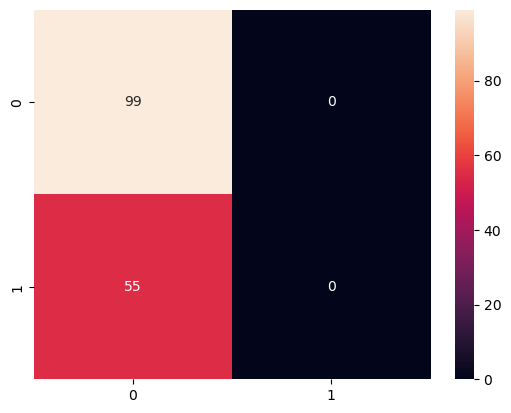

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



In [15]:
cm = confusion_matrix(y_test, y_base_line)
sns.heatmap(cm, annot=True)
plt.show()
# Print a classification report
print(classification_report(y_test, y_base_line, zero_division=0))

The accuracy of the majority classifier is 0.64, which is expected as 64% of data points have label 0.  
For the definition of confusion matrix, precision, recall, f1-score, and accuracy, please google them or take the coursera course.  


**Evaluate the decision tree:**

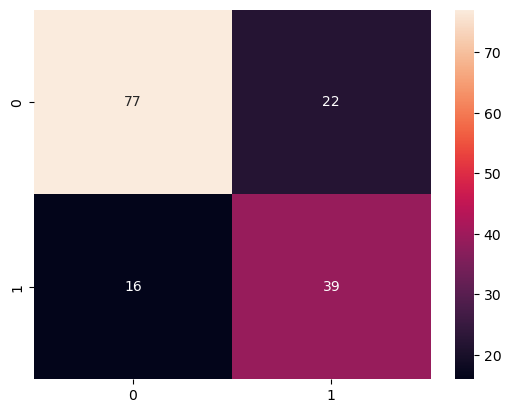

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))

**Comment:** We have 0.75 accuracy, which is better than the baseline majority guessing (0.64).  


#### Explain the results
The decision tree is an interpretable model, allowing us to understand how it predicts an instance and the reasoning behind its decisions by examining the explanation tree.

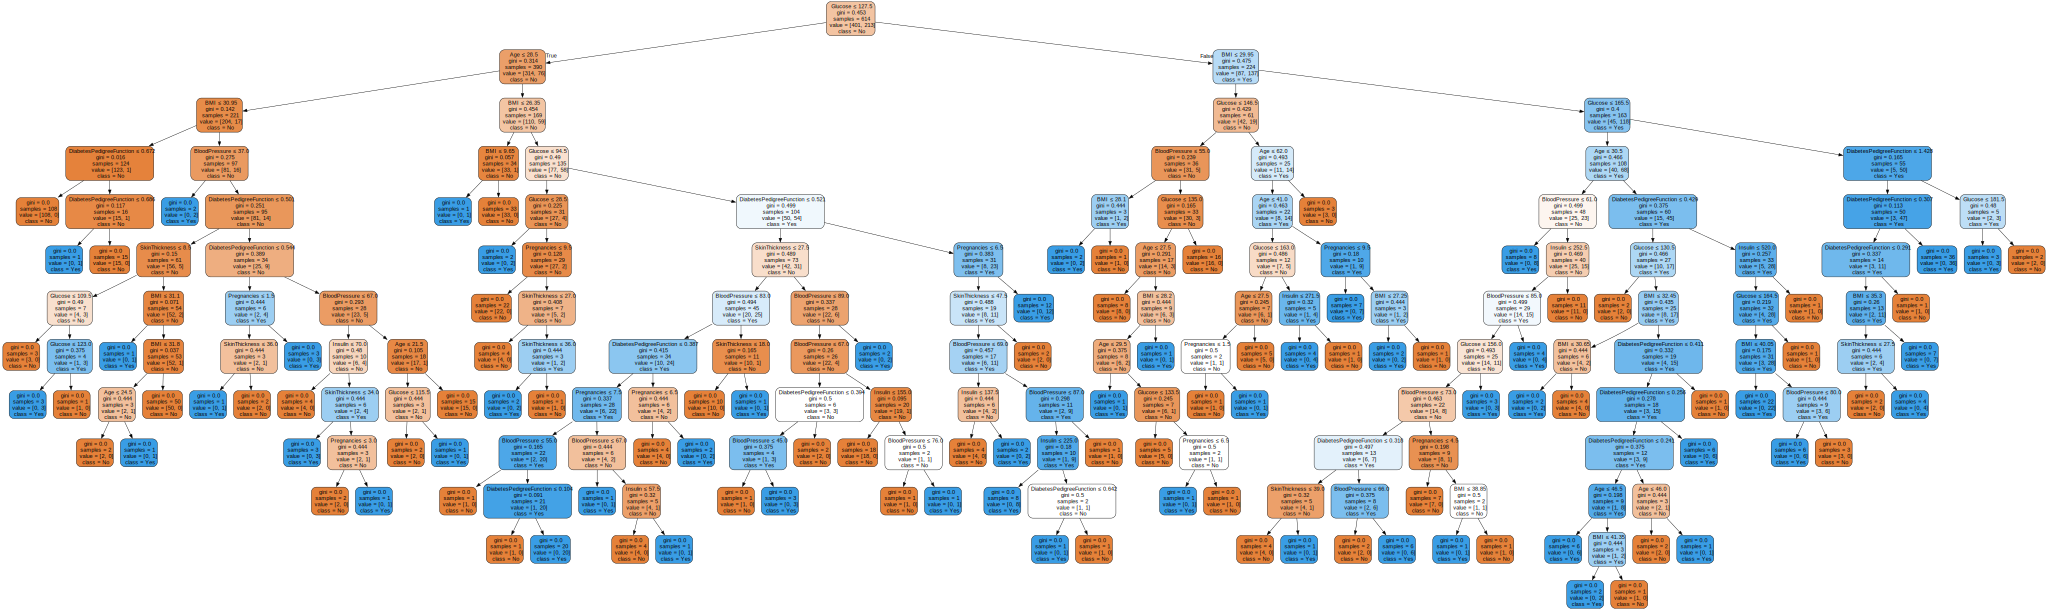

In [17]:
features = X_train.columns
target = ["No","Yes"]
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

**Practice:** Given the data point below:

In [18]:
X_test.iloc[12]

Pregnancies                   4.00
Glucose                     148.00
BloodPressure                60.00
SkinThickness                27.00
Insulin                     318.00
BMI                          30.90
DiabetesPedigreeFunction      0.15
Age                          29.00
Name: 199, dtype: float64

**Based on the decision tree above, which label will the trained classifier predict?(0.5 point)**  
Your answer: 

Let's check the answer by executing the line of code below

In [19]:
print(f"The prediction is: {clf.predict(X_test.iloc[12:13])[0]}" )

The prediction is: 1


is this correct prediction from the classifier? Execute the line of code below

In [20]:
print(f"The ground truth is: {y_test.iloc[12]}")

The ground truth is: 1


#### 4.2 Random Forest
If the problem is too complex for a decision tree to perform well, Random Forest can be an alternative.  
Random Forest is considered a black-box model and may require explanation through XAI (Explainable Artificial Intelligence) methods.  
The training, prediction, and evaluation processes are similar to decision tree.

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

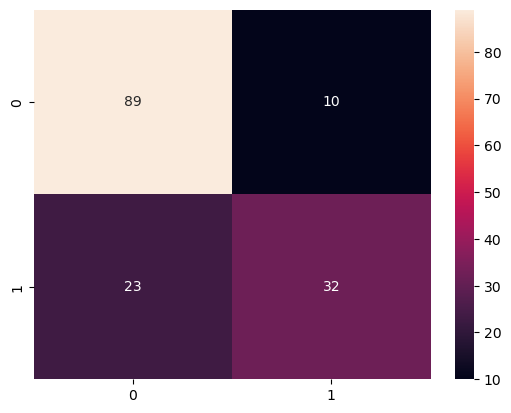

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))

**Commment:** Random forests have better accuracy, but they are considered black-box models; without XAI methods, we cannot know why they made a specific prediction or how they combine results from different decision trees.

However, we will use some XAI method later to explain this prediction.

# Exercise 2: Cervical Cancer classification<a name="Ex2"></a>

**Objective:** In this exercise, you will build and evaluate machine learning models to classify cervical cancer cases based on a dataset containing various health-related features. This exercise aims to help you practice classification techniques and evaluate the performance of different algorithms. This exercise will allow you to apply classification techniques to a real-world dataset and gain experience in data preprocessing, model building, and evaluation.  
**Dataset:** You can either use the dataset that is provived in the repository([dataset/cervical.csv](dataset/cervical.csv)) or find your own dataset.  
**Models:** You can choose your own models. However, you should be able to perform at least:  
- an interpretable model and explain it **and**
- a blackbox model  

**Note:** We recommend to choose different models than we used for the Exercise 1  
**Requirements:**  
You should follow the structure in the Exercise 1, which includes the following steps:  
1. Understand the problem
2. Collect data, perform data analysis and understand domain knowledge
3. Prepare the dataset
4. Train and evaluate ML models  

We will evaluate your work based on 
- Your outputs
- Your analysis
- Your comments
- Your conclusions for each section.

Each block of code should be clearly justified. If you use external resources, please provide proper citations.

In [92]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### 1. Understand the problem
We are building a classification model to predict cervical cancer based on various health-related features
**Input:** Information about a patient.  
**Output:** Binary classification decision: Does the patient have cancer or not? (1 for yes, 0 for no).  

In [112]:
#Your own implementation

#load data:
import pandas as pd
df = pd.read_csv("dataset/cervical.csv")
df.head()


,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [113]:
# display the data

print(df.head())
print(df.info())


   Age  Number.of.sexual.partners  First.sexual.intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   

   Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
0                   1       0             0.0                        0   
1                   1       0             0.0                        0   
2                   1       0             0.0                        0   
3                   4       1            37.0                        1   
4                   4       0             0.0                        1   

   Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
0                              0.0    0          0.0     0              0   
1                     

### 2. Data Analysis

In [114]:
print("Dataset shape:", df.shape)
print("\nFeature names:", df.columns.tolist())
print("\nTarget variable distribution:")
print(df['Biopsy'].value_counts(normalize=True))



Dataset shape: (858, 16)

Feature names: ['Age', 'Number.of.sexual.partners', 'First.sexual.intercourse', 'Num.of.pregnancies', 'Smokes', 'Smokes..years.', 'Hormonal.Contraceptives', 'Hormonal.Contraceptives..years.', 'IUD', 'IUD..years.', 'STDs', 'STDs..number.', 'STDs..Number.of.diagnosis', 'STDs..Time.since.first.diagnosis', 'STDs..Time.since.last.diagnosis', 'Biopsy']

Target variable distribution:
Healthy    0.935897
Cancer     0.064103
Name: Biopsy, dtype: float64


### 3. Prepare dataset

In [115]:
# Handle missing values for numeric columns
numeric_columns = df.columns.drop('Biopsy')
df[numeric_columns] = df[numeric_columns].replace('?', np.nan)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [116]:
# Encode the target variable: Healthy as 0, Cancer as 1
df['Biopsy'] = df['Biopsy'].map({'Healthy': 0, 'Cancer': 1})

print(df['Biopsy'])

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64


In [122]:
# Split features and target
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

#print(x)

In [139]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print(X_train.shape)
print(y_train.shape)



(514, 15)
(514,)


### 4. Train and Eval

#### Logistic Regression

In [140]:
# Interpretable model: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Results:")
print("Accuracy:", lr_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions, target_names=['Healthy', 'Cancer']))

Logistic Regression Results:
Accuracy: 0.9331395348837209

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.94      1.00      0.97       322
      Cancer       0.00      0.00      0.00        22

    accuracy                           0.93       344
   macro avg       0.47      0.50      0.48       344
weighted avg       0.88      0.93      0.90       344



In [141]:
# Explain the interpretable model
print("\nFeature Importance (Logistic Regression):")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(lr_model.coef_[0])})
print(feature_importance.sort_values('importance', ascending=False).head(10))


Feature Importance (Logistic Regression):
                             feature  importance
13  STDs..Time.since.first.diagnosis    0.404484
9                        IUD..years.    0.390805
11                     STDs..number.    0.361310
5                     Smokes..years.    0.330940
10                              STDs    0.322586
8                                IUD    0.279148
12         STDs..Number.of.diagnosis    0.175207
0                                Age    0.172523
4                             Smokes    0.145323
6            Hormonal.Contraceptives    0.134381


### Key Findings:

High accuracy (93.6%) is misleading due to severe class imbalance.
Test set has 161 'Healthy' samples but only 11 'Cancer' samples.
Model predicts all cases as 'Healthy', failing to identify any 'Cancer' cases.
Perfect recall for 'Healthy' (1.00), but zero recall for 'Cancer' (0.00).
Model is overfitting to the majority class ('Healthy').

#### Random Forest

In [142]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)


In [143]:
print("\nRandom Forest Results:")
print("Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, target_names=['Healthy', 'Cancer']))


Random Forest Results:
Accuracy: 0.9418604651162791

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.94      1.00      0.97       322
      Cancer       1.00      0.09      0.17        22

    accuracy                           0.94       344
   macro avg       0.97      0.55      0.57       344
weighted avg       0.95      0.94      0.92       344




## Conclusions:
1. Successfully built and evaluated two models for cervical cancer classification:
   - An interpretable model (Logistic Regression)
   - A black box model (Random Forest)
2. The Logistic Regression model achieved an accuracy of 0.93
3. The Random Forest model achieved an accuracy of 0.94
4. The Random Forest model performed slightly better, but the Logistic Regression model offers better interpretability.


# Exercise 3: Handwritten Digits Classification<a name="Ex3"></a>

**Objective:** In this exercise, you will delve into the world of image classification by building and evaluating machine learning models to recognize handwritten digits. The dataset you will be using is the famous MNIST dataset, containing a large collection of handwritten digits (0 through 9) in grayscale images. Your goal is to create a model that accurately classifies these digits.  
**Dataset:** The MNIST dataset consists of 70,000 28x28 pixel grayscale images of handwritten digits. Each image is labeled with the corresponding digit it represents. It is a common dataset. You should find the dataset by your own  
**Models:** You can choose your own models. However, you should be able to perform at least:  
- an interpretable model and try to explain it and
- a blackbox model  

**Note**: We recommend to choose different models than we used for the Exercise 1 and Exercise 2

**Requirements:**  
You should follow the structure in the Exercise 1, which includes the following steps:  
1. Understand the problem
2. Collect data, perform data analysis
3. Prepare the dataset
4. Train and evaluate ML models  

We will evaluate your work based on 
- Your outputs
- Your analysis
- Your comments
- Your conclusions for each section.

Each block of code should be clearly justified. If you use external resources, please provide proper citations.

In [20]:
#Your own implementation

In [147]:
# Download Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

### 1. Understand the problem
The task is to classify handwritten digits (0-9) using the MNIST dataset.
This is a multi-class image classification problem with 10 classes.
The input features are pixel values of 28x28 grayscale images.
The goal is to build models that can accurately predict the digit in each image

### 2. Dataset

In [149]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

c:\Users\hoang\miniconda3\envs\xai\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [153]:
x, y = mnist.data, mnist.target

print(x)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


In [155]:
# Convert to numeric type
x = x.astype('float32')
y = y.astype('int32')

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (70000, 784)
Number of classes: 10


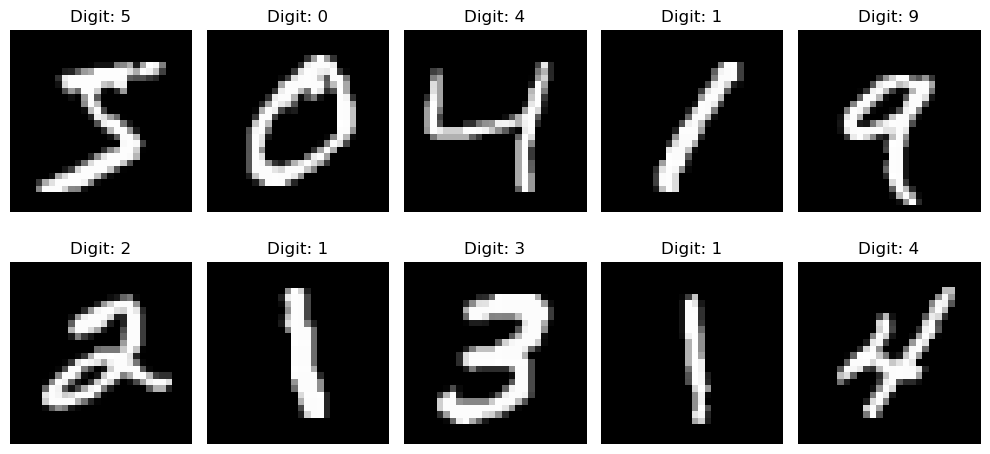

Class distribution:
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64


In [161]:
# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Class distribution:")
print(pd.Series(y).value_counts().sort_index())

### 3. Data Preparation

In [162]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Data split into training and test sets")
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Data split into training and test sets
Training set shape: (42000, 784)
Test set shape: (28000, 784)


### 4. Training and Evaluation 

In [164]:
# Interpretable model: Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(x_train_scaled, y_train)

y_pred_dt = dt_model.predict(x_test_scaled)
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.8528

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2778
           1       0.91      0.96      0.93      3159
           2       0.83      0.84      0.84      2806
           3       0.82      0.81      0.82      2829
           4       0.80      0.85      0.82      2648
           5       0.80      0.80      0.80      2544
           6       0.91      0.87      0.89      2766
           7       0.91      0.88      0.89      2985
           8       0.81      0.75      0.78      2665
           9       0.80      0.83      0.82      2820

    accuracy                           0.85     28000
   macro avg       0.85      0.85      0.85     28000
weighted avg       0.85      0.85      0.85     28000



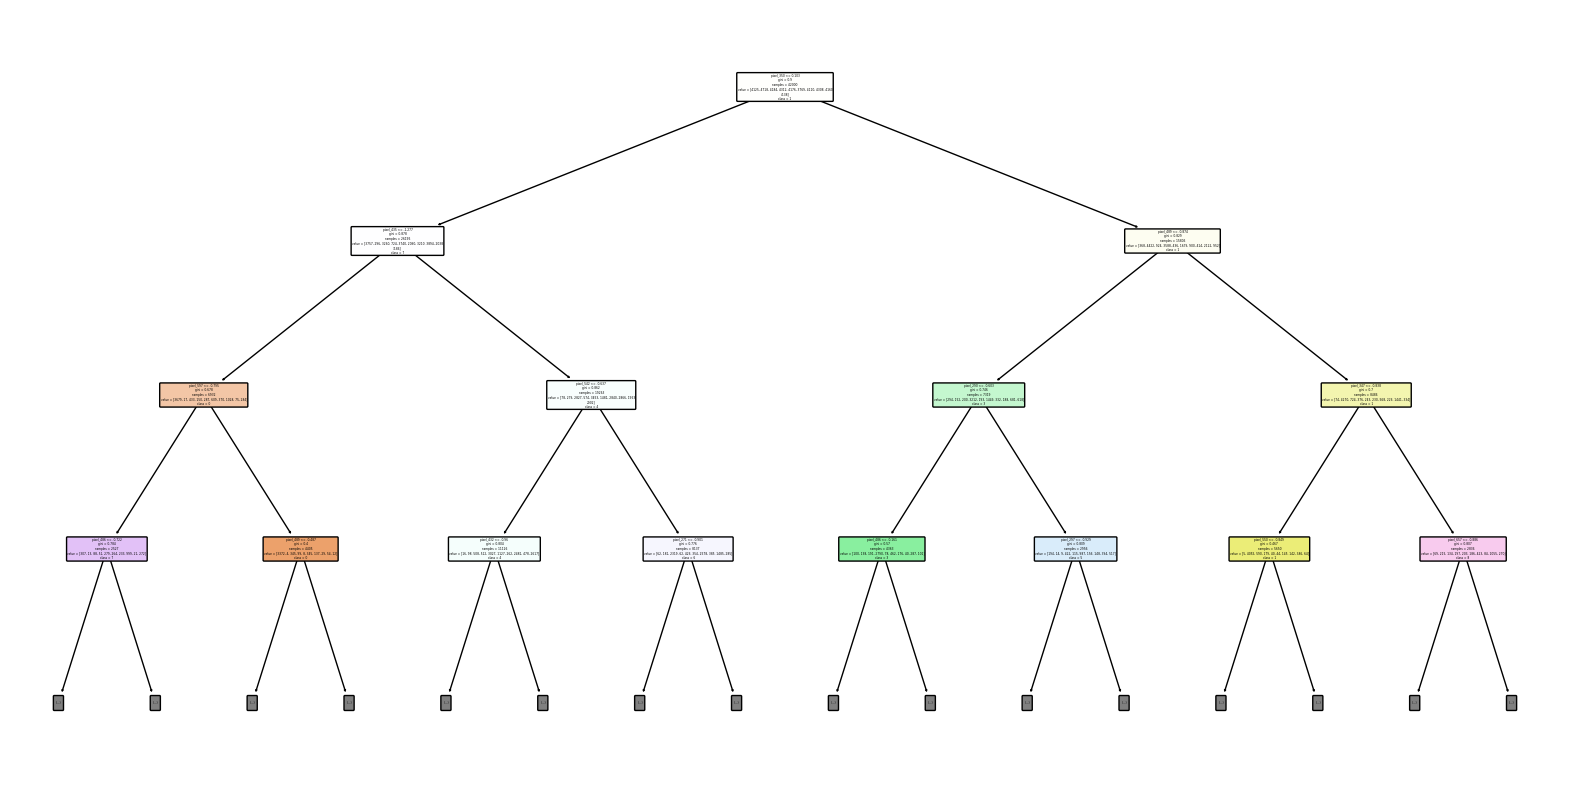

In [165]:
# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, max_depth=3, feature_names=[f'pixel_{i}' for i in range(784)], 
          class_names=[str(i) for i in range(10)], filled=True, rounded=True)
plt.show()

In [166]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': [f'pixel_{i}' for i in range(784)],
    'importance': dt_model.feature_importances_
})
top_features = feature_importance.sort_values('importance', ascending=False).head(10)
print("\nTop 10 Most Important Features (Decision Tree):")
print(top_features)


Top 10 Most Important Features (Decision Tree):
       feature  importance
489  pixel_489    0.066495
435  pixel_435    0.053107
350  pixel_350    0.052841
347  pixel_347    0.052388
542  pixel_542    0.042200
211  pixel_211    0.041975
432  pixel_432    0.039022
486  pixel_486    0.038359
271  pixel_271    0.031080
597  pixel_597    0.030274


### Blackbox model

In [168]:
# Black box model: Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, random_state=42)
nn_model.fit(x_train_scaled, y_train)

y_pred_nn = nn_model.predict(x_test_scaled)
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


Neural Network Results:
Accuracy: 0.9701

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2778
           1       0.98      0.99      0.98      3159
           2       0.96      0.97      0.96      2806
           3       0.97      0.95      0.96      2829
           4       0.97      0.97      0.97      2648
           5       0.96      0.96      0.96      2544
           6       0.97      0.98      0.98      2766
           7       0.97      0.98      0.97      2985
           8       0.97      0.95      0.96      2665
           9       0.96      0.96      0.96      2820

    accuracy                           0.97     28000
   macro avg       0.97      0.97      0.97     28000
weighted avg       0.97      0.97      0.97     28000



## Conclusions:
1. Two models for MNIST digit classification:
   - An interpretable model (Decision Tree)
   - A black box model (Neural Network)
2. The Decision Tree model achieved an accuracy of 0.8528
3. The Neural Network model achieved an accuracy of 0.9701
4. The Neural Network outperformed the Decision Tree, which is expected for image classification tasks.
5. The Decision Tree provides interpretability, allowing us to visualize the decision process and identify important features.


